### simple neural nrwtoork to recognize numbers 

In [1]:
# first install tensorflow 
#import sys
#!{sys.executable} -m pip install tensorflow

## Outline 
- import keras numbers dataset 
- Split Data
- Sclaing
- build Nueral Model 
- Build Layers 
- fit model 
- evaluate
- test model 
- save model 
- load 
- predict 

## import libraries  

In [2]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt

## import dataset 

In [3]:
minst = tf.keras.datasets.mnist 

- the dataset contains 28x28 pixel images for numbers from 0 to 9

## Split the data 

In [4]:
(x_train , y_train) , (x_test,y_test) = minst.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [5]:
# see the train data
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

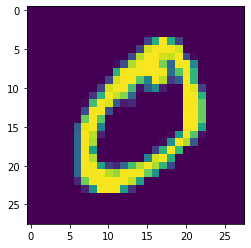

In [6]:
# display one number 
plt.imshow(x_train[1])
plt.show()

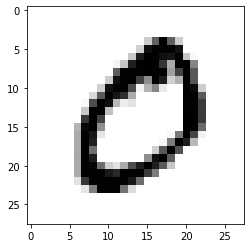

In [7]:
# display the same image in black & white colors 
plt.imshow(x_train[1] , cmap=plt.cm.binary)
plt.show()

## Scalling 

In [8]:
x_train = tf.keras.utils.normalize(x_train , axis=1)
x_test = tf.keras.utils.normalize(x_test , axis=1)

In [9]:
# see the data after scalling 
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

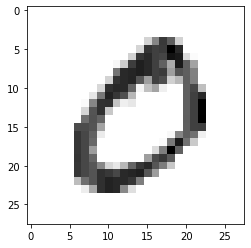

In [10]:
# display the first image in black & white 
plt.imshow(x_train[1] , cmap=plt.cm.binary)
plt.show()

In [11]:
# see the train data shape 
x_train.shape

(60000, 28, 28)

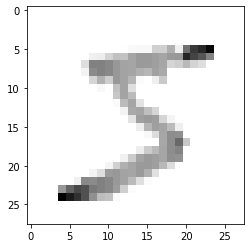

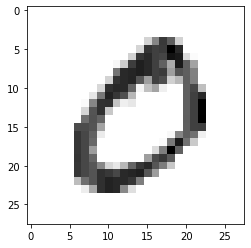

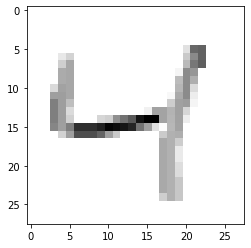

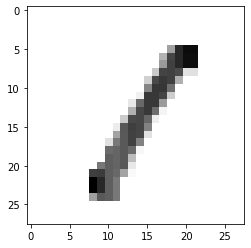

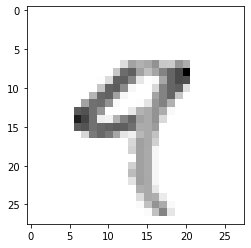

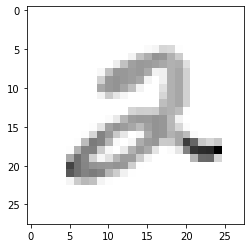

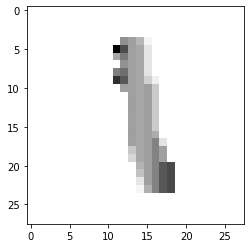

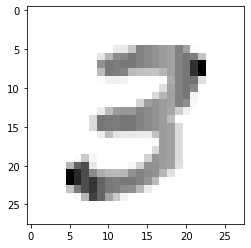

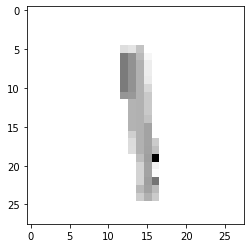

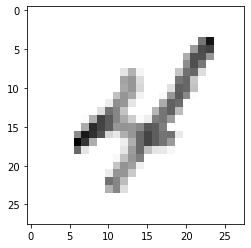

In [12]:
# let's see the first 10 images 
for x in x_train[:10]:
    plt.imshow(x , cmap=plt.cm.binary)
    plt.show()

## Build The Model 

In [13]:
model = tf.keras.models.Sequential()

# Input Layer
model.add(tf.keras.layers.Flatten())

# 1 hidden layer
model.add(tf.keras.layers.Dense(128 , activation=tf.nn.relu))   # Relu


# 2 hidden layer
model.add(tf.keras.layers.Dense(128 , activation=tf.nn.relu)) 


# output 
model.add(tf.keras.layers.Dense(10 , activation=tf.nn.softmax)) 


# compile model 
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)


model.fit(x_train , y_train , epochs=6)

2023-02-11 08:47:16.216504: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2023-02-11 08:47:16.436941: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/6
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2581 - accuracy: 0.9243
Epoch 2/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1076 - accuracy: 0.9667
Epoch 3/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0714 - accuracy: 0.9780
Epoch 4/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0536 - accuracy: 0.9830
Epoch 5/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0405 - accuracy: 0.9869
Epoch 6/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0311 - accuracy: 0.9893


## Evaluate the model 

In [14]:
loss , accurecy = model.evaluate(x_test , y_test)
print(loss)
print(accurecy)

313/313 [==============================] - 1s 1ms/step - loss: 0.0870 - accuracy: 0.9749
0.08702708780765533
0.9749000072479248


- Accuracy = .97

## Save the Model 

In [15]:
model.save('Number_Digits.model')

2023-02-11 08:47:59.061864: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


## Load the Model 

In [16]:
# load model 
loaded_model = tf.keras.models.load_model('Number_Digits.model')

## Predict 

In [17]:
predictions = loaded_model.predict([x_test])
predictions

array([[1.3643220e-09, 1.8086675e-09, 9.1708394e-08, ..., 9.9999893e-01,
        3.3184608e-09, 1.0689141e-08],
       [4.5601401e-14, 1.0559036e-05, 9.9998844e-01, ..., 6.4835234e-12,
        1.4165499e-08, 1.2931922e-16],
       [1.4790775e-08, 9.9996984e-01, 1.3257354e-06, ..., 1.6589966e-05,
        2.8276665e-06, 4.6815991e-09],
       ...,
       [5.5671344e-12, 1.0574862e-08, 4.8394172e-10, ..., 2.3459781e-07,
        2.9958525e-08, 1.5818395e-06],
       [1.8113083e-10, 1.6277415e-11, 6.8615107e-11, ..., 3.9881423e-10,
        1.7598603e-04, 3.3442151e-09],
       [1.6845657e-10, 2.5888960e-10, 7.2271845e-08, ..., 4.9720588e-15,
        1.7551203e-07, 1.2961286e-12]], dtype=float32)

## Test the model 

In [18]:
np.argmax(predictions[0])   # the model predicted the first value = 7

7

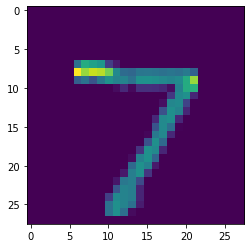

In [19]:
plt.imshow(x_test[0])
plt.show()

- it is 7 so the model predicted the value correctly 